# PCA NMF & t-SNE

by: Omarkhan Magzhan

In [114]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

%matplotlib inline

In [115]:
df_train = pd.read_csv("C:\\Users\\Magzhan\\Downloads\\pca\\train.csv")
df_test = pd.read_csv("C:\\Users\\Magzhan\\Downloads\\pca\\test.csv") 

In [116]:
df_train = pd.read_csv("C:\\Users\\Magzhan\\Downloads\\pca\\train.csv", nrows=2000)
train, test = train_test_split(df_train, test_size=0.2, random_state=0)

In [117]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 12.0 MB


In [118]:
#Splitting the data into features and target
train_X = train[train.columns[1:]]
train_y = train['label']

test_X = test[test.columns[1:]]
test_y = test['label']

# Visualization and Classification by Dimensionality Reduction¶

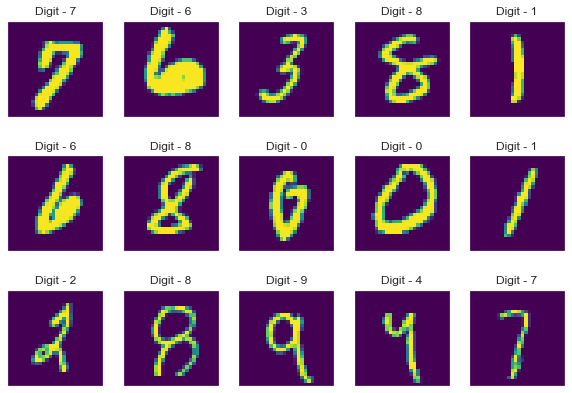

In [119]:
#Lets check the first 15 images

fig, ax = plt.subplots(3,5, figsize=(10,7), subplot_kw={'xticks':(), 'yticks': ()})
ax = ax.ravel()
for i in range(15):
    pixels = train_X.iloc[i].values.reshape(-1,28)
    ax[i].imshow(pixels, cmap='viridis')
    ax[i].set_title("Digit - " + str(train_y.iloc[i]))

In [120]:
#We can scale the grayscale value to be between 0 and 1 for better stability

train_X_scaled = train_X/255
test_X_scaled = test_X/255

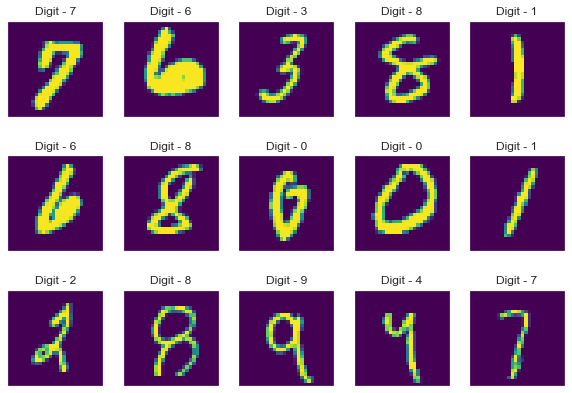

In [121]:
#Lets plot again to see if scaling affected the acutal images

fig, ax = plt.subplots(3,5, figsize=(10,7), subplot_kw={'xticks':(), 'yticks': ()})
ax = ax.ravel()
for i in range(15):
    pixels = train_X_scaled.iloc[i].values.reshape(-1,28)
    ax[i].imshow(pixels, cmap='viridis')
    ax[i].set_title("Digit - " + str(train_y.iloc[i]))

Q:\Program Files\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

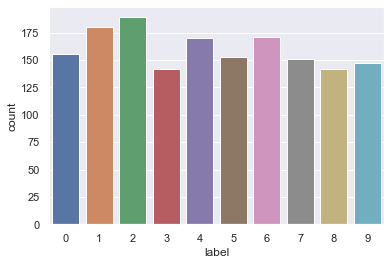

In [122]:
#Lets check the input data to see if it is skewed. If it is skewed it will affect the feature extraction
#But we can see data is almost uniformly distributed
sns.countplot(train_y)

# Principal Component Analysis (PCA)

In [123]:
#Reducing dimension into 2 components
pca = PCA(n_components=2, random_state=0, whiten=True)
pca.fit(train_X_scaled)

PCA(n_components=2, random_state=0, whiten=True)

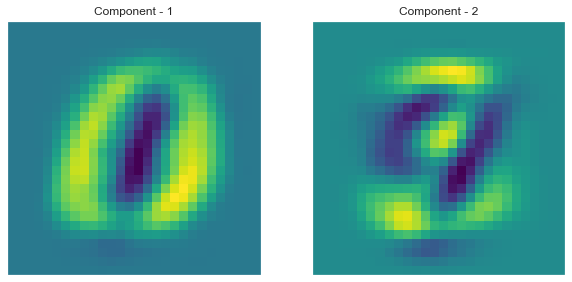

In [124]:
#Lets see the components from PCA
fig, ax = plt.subplots(1,2, figsize=(10,6), subplot_kw={'xticks':(), 'yticks': ()})
ax = ax.ravel()
for i in range(2):
    pixels = pca.components_[i].reshape(-1,28)
    ax[i].imshow(pixels, cmap='viridis')
    ax[i].set_title("Component - " + str(i+1))

Text(0, 0.5, 'Componene 2')

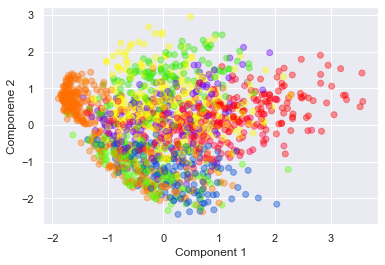

In [125]:
#transform the train and test data using the above 2 components
train_X_pca = pca.transform(train_X_scaled)
test_X_pca = pca.transform(test_X_scaled)

#plot the components
plt.scatter(train_X_pca[:,0], train_X_pca[:,1], c=train_y.values,  cmap='prism', alpha=0.4)
plt.xlabel('Component 1')
plt.ylabel('Componene 2')

As we can see PCA did not do a good job in classification with 2 components, most of the data points are overlapping each other.

In [126]:
#Classification by KNN- As we expect the score would be very low
knn_pca = KNeighborsClassifier(n_neighbors=4, n_jobs=8)
knn_pca.fit(train_X_pca, train_y)
print("Train score {} ".format(knn_pca.score(train_X_pca, train_y)))
print("Test score {} ".format(knn_pca.score(test_X_pca, test_y)))

Train score 0.6025 
Test score 0.3875 


In [127]:
#From the below explained variance we can see that 2 components are not enough to capture all varience in data
pca.explained_variance_ratio_

array([0.09849813, 0.07436017])

In [128]:
#Lets check how many principal componenets will be required to capture maximum varience
pca = PCA(random_state=0, whiten=True)
pca.fit(train_X_scaled)

#Cumulative sum of varience ratio of all components
exp_var_cum=np.cumsum(pca.explained_variance_ratio_)

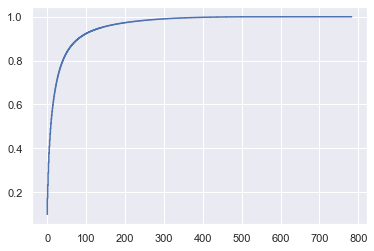

In [129]:
plt.step(range(exp_var_cum.size), exp_var_cum)

From the above plot it is obvious that we need at least 50 components to capture maximum variance

In [130]:
# I can see 25 components are enough to capture 70% varience
exp_var_cum[25]

0.7067512232762136

In [131]:
#Lets try with 25 PCA Components.

pca = PCA(n_components=25, random_state=0, whiten=True)
pca.fit(train_X_scaled)
train_X_pca = pca.transform(train_X_scaled)
test_X_pca = pca.transform(test_X_scaled)

knn_pca = KNeighborsClassifier(n_neighbors=3, n_jobs=8)
knn_pca.fit(train_X_pca, train_y)
print("Train score {} ".format(knn_pca.score(train_X_pca, train_y)))
print("Test score {} ".format(knn_pca.score(test_X_pca, test_y)))

Train score 0.9475 
Test score 0.88 


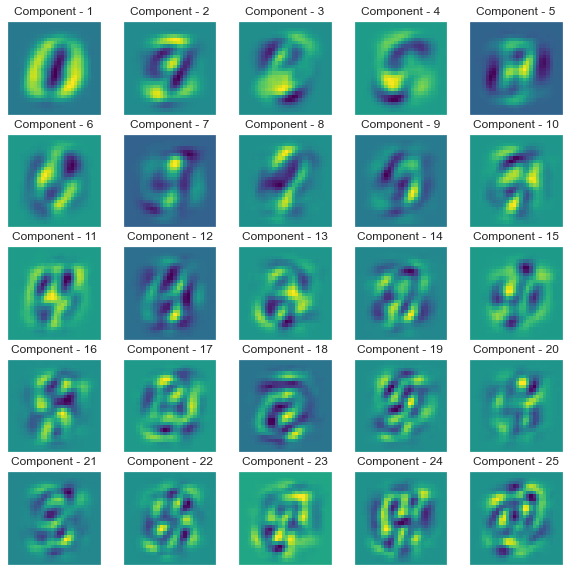

In [132]:
#Lets see all 25 PCA Componenets we used for the model
fig, ax = plt.subplots(5,5, figsize=(10,10), subplot_kw={'xticks':(), 'yticks': ()})
ax = ax.ravel()
for i in range(25):
    pixels = pca.components_[i].reshape(-1,28)
    ax[i].imshow(pixels, cmap='viridis')
    ax[i].set_title("Component - " + str(i+1))

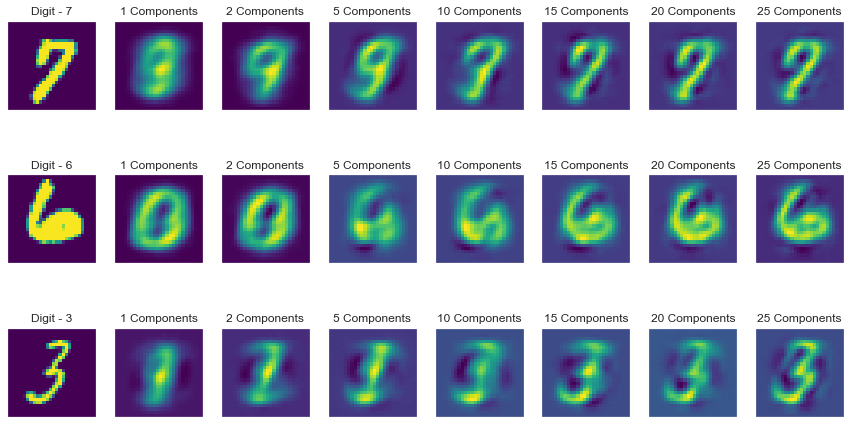

In [133]:
#Lets reconstruct the images using different number of PCA Components
fig, ax = plt.subplots(3,8, figsize=(15,8), subplot_kw={'xticks':(), 'yticks': ()})
components=[1,2,5,10,15,20,25]
for i in range(3):
    for j in range(8):
        if j == 0:
            pixels = train_X_scaled.iloc[i].values.reshape(-1,28)
            ax[i][j].imshow(pixels, cmap='viridis')
            ax[i][j].set_title("Digit - " + str(train_y.iloc[i]))
        else:
            pca = PCA(n_components=components[j-1], random_state=0, whiten=True)
            pca.fit(train_X_scaled)
            train_X_pca = pca.transform(train_X_scaled)
            train_X_pca_back = pca.inverse_transform(train_X_pca)
        
            pixels = train_X_pca_back[i].reshape(-1,28)
            ax[i][j].imshow(pixels, cmap='viridis')
            ax[i][j].set_title(str(components[j-1]) + " Components")

We were able to reconstruct a decent image using 25 principal components

# Non-Negative Matrix Factorization (NMF)

In [134]:
nmf = NMF(n_components=2, random_state=0)
nmf.fit(train_X_scaled)

Q:\Program Files\anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(n_components=2, random_state=0)

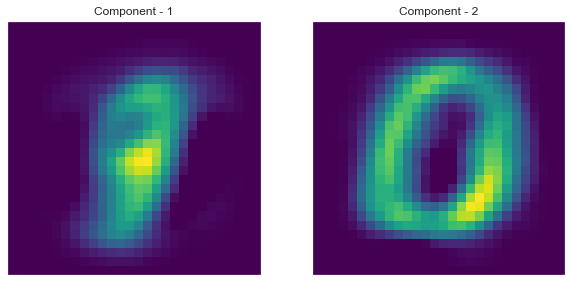

In [135]:
#Lets see the components from NMF
fig, ax = plt.subplots(1,2, figsize=(10,6), subplot_kw={'xticks':(), 'yticks': ()})
ax = ax.ravel()
for i in range(2):
    pixels = nmf.components_[i].reshape(-1,28)
    ax[i].imshow(pixels, cmap='viridis')
    ax[i].set_title("Component - " + str(i+1))

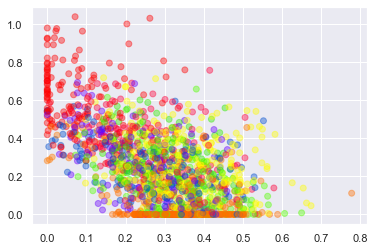

In [136]:
train_X_nmf = nmf.transform(train_X_scaled)
test_X_nmf = nmf.transform(test_X_scaled)

plt.scatter(train_X_nmf[:,0], train_X_nmf[:,1], c=train_y.values,  cmap='prism', alpha=0.4)

As we can see, with 2 components, NMF did not do a good job either.

In [137]:
#Classification by KNN
knn_nmf = KNeighborsClassifier(n_neighbors=5, n_jobs=8)
knn_nmf.fit(train_X_nmf, train_y)
print("Train score {} ".format(knn_nmf.score(train_X_nmf, train_y)))
print("Test score {} ".format(knn_nmf.score(test_X_nmf, test_y)))

Train score 0.471875 
Test score 0.3 


In [138]:
#With nore NMF components
nmf = NMF(n_components=30, random_state=0)
nmf.fit(train_X_scaled)
train_X_nmf = nmf.transform(train_X_scaled)
test_X_nmf = nmf.transform(test_X_scaled)

knn_nmf = KNeighborsClassifier(n_neighbors=4, n_jobs=8)
knn_nmf.fit(train_X_nmf, train_y)
print("Train score {} ".format(knn_nmf.score(train_X_nmf, train_y)))
print("Test score {} ".format(knn_nmf.score(test_X_nmf, test_y)))

Q:\Program Files\anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
Q:\Program Files\anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Train score 0.92375 
Test score 0.86 


# t-SNE Manifold Learning

Q:\Program Files\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
Q:\Program Files\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


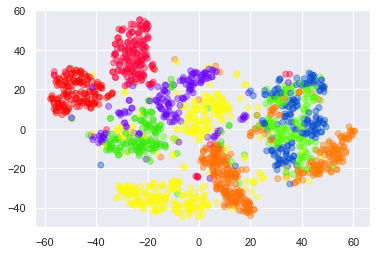

In [139]:
tsne = TSNE(n_components=2, random_state=0)
train_X_tsne = tsne.fit_transform(train_X_scaled, train_y)

plt.scatter(train_X_tsne[:,0], train_X_tsne[:,1], c=train_y.values,  cmap='prism', alpha=0.4)

# ------------------------------------------------------------------------------------------------------

# PCA

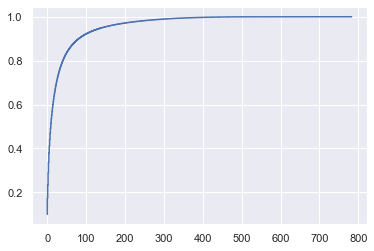

In [140]:
from sklearn.decomposition import PCA
pca = PCA(random_state=0,whiten=True)
pca.fit(X_train)
exp_var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.step(range(exp_var_cum.size),exp_var_cum)

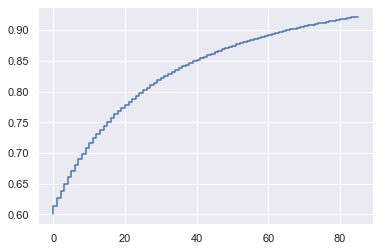

In [141]:
sns.set()
plt.step(range(exp_var_cum[15:101].size),exp_var_cum[15:101])

In [142]:
pca =PCA(n_components=40,random_state=0,whiten=True)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [143]:
from sklearn.neighbors import KNeighborsClassifier
temp = []
for i in range(1,10):
    knn_pca = KNeighborsClassifier(n_neighbors=i,n_jobs=8)
    knn_pca.fit(X_train_pca,Y_train)
    train_score_pca = knn_pca.score(X_train_pca,Y_train)
    test_score_pca = knn_pca.score(X_test_pca,Y_test)
#     print(i,':','train_score_pca=',train_score_pca)
#     print(i,':','test_score_pca',test_score_pca)
    li = [i,train_score_pca,test_score_pca]
    temp.append(li)
temp

[[1, 1.0, 0.9146666666666666],
 [2, 0.9457777777777778, 0.8733333333333333],
 [3, 0.9435555555555556, 0.9],
 [4, 0.9355555555555556, 0.9013333333333333],
 [5, 0.9302222222222222, 0.9013333333333333],
 [6, 0.9208888888888889, 0.9066666666666666],
 [7, 0.9173333333333333, 0.9013333333333333],
 [8, 0.9137777777777778, 0.9],
 [9, 0.9115555555555556, 0.908]]

# NMF


In [144]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=30,random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

knn_nmf = KNeighborsClassifier(n_neighbors=4,n_jobs=8)
knn_nmf.fit(X_train_nmf,Y_train)
print('Train score:',knn_nmf.score(X_train_nmf,Y_train))
print('test score:',knn_nmf.score(X_test_nmf,Y_test))

Q:\Program Files\anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
Q:\Program Files\anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Train score: 0.9182222222222223
test score: 0.8866666666666667


# t-SNE


Q:\Program Files\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
Q:\Program Files\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


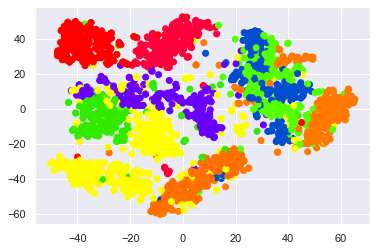

In [145]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,random_state=0)
X_train_tsne = tsne.fit_transform(X_train,Y_train)

plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1],c=Y_train.values,cmap='prism')

Q:\Program Files\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
Q:\Program Files\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


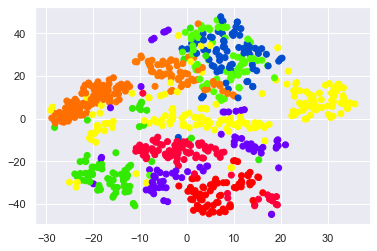

In [146]:
X_test_tsne = tsne.fit_transform(X_test,Y_test)
plt.scatter(X_test_tsne[:,0],X_test_tsne[:,1],c=Y_test.values,cmap='prism')